In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
arq = files.upload()

Saving hotel_bookings_limpo.csv to hotel_bookings_limpo (3).csv


In [3]:
df = pd.read_csv("hotel_bookings_limpo.csv")
df.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces
75129,City Hotel,1,281,2015,July,25,2,2,2,BB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,Transient-Party,62.0,0
114249,City Hotel,0,263,2017,June,23,2,2,2,BB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,Transient-Party,105.0,0
74674,City Hotel,1,283,2015,July,27,1,1,2,BB,PRT,Groups,TA/TO,0,A,A,0,Non Refund,Transient-Party,62.0,0


#Trabalhando com datas

In [ ]:
#df["arrival_date_year"] = pd.to_datetime(df["arrival_date_year"])

In [4]:
df["arrival_date_day_of_month"] = pd.to_datetime(df["arrival_date_day_of_month"])

Total do tempo de espera por ano

In [ ]:
df[["arrival_date_year", "lead_time"]].groupby(["arrival_date_year"]).sum()

,lead_time
arrival_date_year,
2015,2129968
2016,5828166
2017,4444287


Total do tempo de espera por mês ao longo dos anos

In [ ]:
df[["arrival_date_year", "lead_time", "arrival_date_month"]].groupby(["arrival_date_year", "arrival_date_month"]).sum()

lead_time
arrival_date_year arrival_date_month           
2015              August                 385224
                  December               152783
                  July                   349148
                  November               112466
                  October                504668
                  September              625679
2016              April                  465762
                  August                 614760
                  December               344922
                  February               150981
                  January                 73006
                  July                   562279
                  June                   633882
                  March                  276333
                  May                    628121
                  November               407586
                  October                864755
                  September              805779
2017              April                  584790
                  August                 678658
                  February               234819
                  January                195430
                  July                   812751
                  June                   768791
                  March                  410068
                  May                    758980

Número de hóspedes por ano e por mês (desconsiderando as crianças)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118898 entries, 0 to 118897
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   hotel                        118898 non-null  object        
 1   is_canceled                  118898 non-null  int64         
 2   lead_time                    118898 non-null  int64         
 3   arrival_date_year            118898 non-null  int64         
 4   arrival_date_month           118898 non-null  object        
 5   arrival_date_day_of_month    118898 non-null  datetime64[ns]
 6   stays_in_weekend_nights      118898 non-null  int64         
 7   stays_in_week_nights         118898 non-null  int64         
 8   adults                       118898 non-null  int64         
 9   meal                         118898 non-null  object        
 10  country                      118898 non-null  object        
 11  market_segment            

#Trabalhando com soma e média

Número de hóspedes por ano, mês e país

In [ ]:
dg = df[["arrival_date_year","arrival_date_month", "country", "adults"]].groupby(["arrival_date_year", "arrival_date_month", "country"]).sum()
dg

adults
arrival_date_year arrival_date_month country        
2015              August             AGO          23
                                     ARG           4
                                     AUS           7
                                     AUT          12
                                     BEL          46
...                                              ...
2017              May                UMI           2
                                     URY          10
                                     USA         328
                                     VEN           2
                                     ZAF          18

[1939 rows x 1 columns]

Número de permanência de noites por país nos fins de semana

In [ ]:
dg = df[["country", "stays_in_weekend_nights"]].groupby(["country"]).sum()
dg

,stays_in_weekend_nights
country,
ABW,2
AGO,827
AIA,2
ALB,12
AND,9
...,...
VGB,1
VNM,5
ZAF,72


Totalização por de número de adultos para cada tipo de refeição.

In [ ]:
dh = (df[["adults", "meal"]].groupby(["meal"]).sum())
dh

,adults
meal,
BB,169667
FB,1563
HB,27900
SC,19703
Undefined,2126


Média de cancelamentos por canais de distribuição

In [ ]:
df.groupby("distribution_channel")["is_canceled"].mean()

distribution_channel
Corporate    0.224002
Direct       0.175585
GDS          0.191710
TA/TO        0.410509
Undefined    0.000000
Name: is_canceled, dtype: float64

#Trabalhando com gráficos

Gráficos de barras

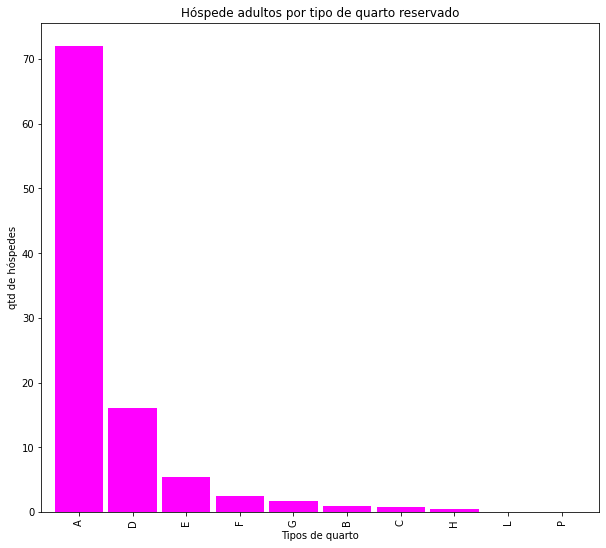

In [30]:
plt.figure( figsize=(10, 9))
(df['reserved_room_type'].value_counts(normalize=True)*100).plot.bar(width = 0.9, title="Hóspede adultos por tipo de quarto reservado", color="magenta")
plt.xlabel("Tipos de quarto")
plt.ylabel("qtd de hóspedes");

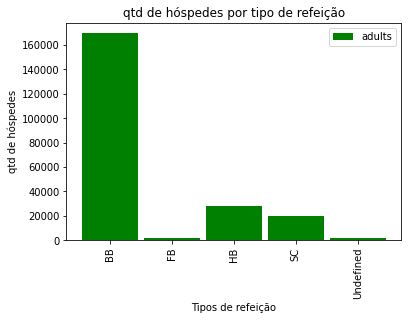

In [38]:
(df[["adults", "meal"]].groupby(["meal"]).sum()).plot.bar(width = 0.9, title="qtd de hóspedes por tipo de refeição", color="green")
plt.xlabel("Tipos de refeição")
plt.ylabel("qtd de hóspedes");

Graficos tipo "pizza"

In [41]:
di = ((df['reserved_room_type'].value_counts(normalize=True))*100)
tipo_reserva = di[di >1]
tipo_reserva

A    71.995324
D    16.125587
E     5.464348
F     2.430655
G     1.751922
Name: reserved_room_type, dtype: float64

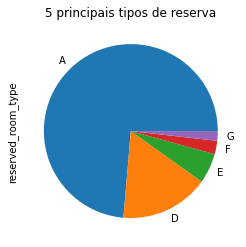

In [45]:
tipo_reserva.plot.pie(x=di, y=((df['reserved_room_type'].value_counts(normalize=True))*100))
plt.title('5 principais tipos de reserva')
plt.show()

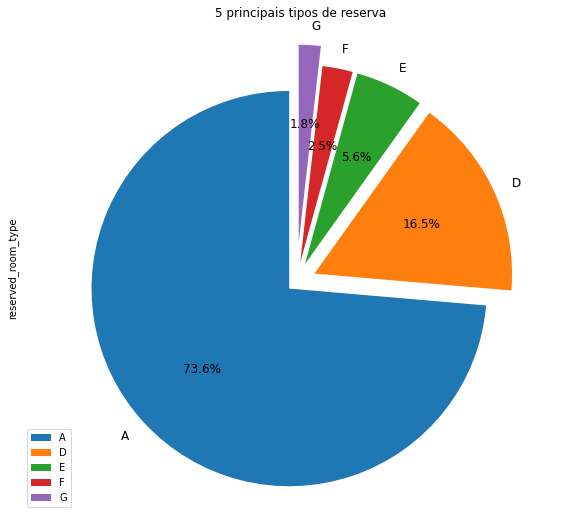

In [ ]:
plt.figure( figsize=(10, 9))
labels = ['A', 'D', 'E', 'F', 'G']
explode = (0.05, 0.1, 0.1, 0.1, 0.2)
tipo_reserva.plot.pie(autopct='%.1f%%', explode=explode, textprops={'fontsize': 12}, startangle= 90)
plt.title('5 principais tipos de reserva')
plt.legend(labels, loc=3)
plt.axis('equal')

plt.show()


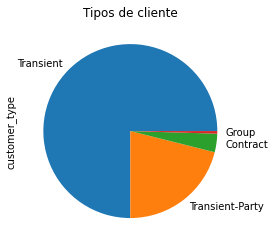

In [46]:
((df['customer_type'].value_counts(normalize=True))*100).plot.pie()
plt.title('Tipos de cliente')
plt.show()





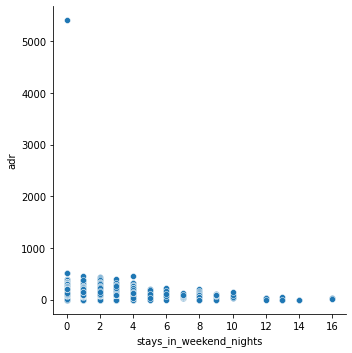

In [48]:
sns.relplot(x="stays_in_weekend_nights", y="adr", data=df)
plt.show()
